In [1]:
import pandas as pd
wine = pd.read_csv("https://raw.githubusercontent.com/bhusal-ujjwal/NewWineDataset/main/Wine.csv")

In [2]:
wine.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [3]:
wine.shape

(178, 14)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
X = wine.iloc[:,:-1] # all rows except customer segment
y = wine.iloc[:,-1] #customer segment

In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [7]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
#scaling the data
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(X)

In [9]:
#load the PCA method
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #reducing the 13 dimensions to 2
pca_features = pca.fit_transform(x_scaled)

In [10]:
#before applying the PCA
x_scaled.shape

(178, 13)

In [11]:
#after applyin the PCA
pca_features.shape

(178, 2)

In [12]:
from pandas.io.formats.style_render import DataFrame
#make a data frame for new dimensions
pca_df = pd.DataFrame(data=pca_features, columns=["WPC 1", "WPC 2"])

In [13]:
pca_df

,WPC 1,WPC 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [14]:
#addinf the target of customer segment coulmn at the end
final_df = pd.concat([pca_df, y], axis=1)

In [15]:
final_df

,WPC 1,WPC 2,Customer_Segment
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,3
174,-2.601956,-1.757229,3
175,-2.677839,-2.760899,3
176,-2.387017,-2.297347,3


In [16]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

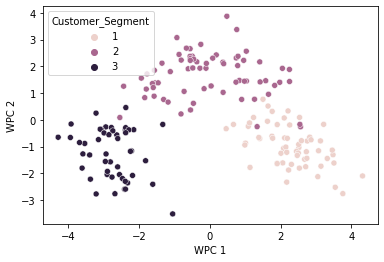

In [17]:
import seaborn as sns
sns.scatterplot(x=final_df["WPC 1"], y = final_df["WPC 2"], hue=final_df["Customer_Segment"], data=final_df)

In [18]:
#prediction using machine learning
from sklearn.model_selection import train_test_split
X= pca_features
y=wine["Customer_Segment"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
#classify with LogisticRegression regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [25]:
#these functions are used to check how accurate the model was with some reports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
#predict the output of the model
y_pred = classifier.predict(X_test)

In [27]:
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 2, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2])

In [28]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       0.96      1.00      0.98        24
           3       1.00      1.00      1.00        15

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

[[19  1  0]
 [ 0 24  0]
 [ 0  0 15]]


In [29]:
#classification using random forest classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [31]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       0.96      1.00      0.98        24
           3       1.00      1.00      1.00        15

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

